In [ ]:
# Kết nối Google Drive (nếu chạy trong Colab)
try:
    from google.colab import drive
    print("Kết nối Google Drive...")
    drive.mount('/content/drive')
except:
    print("Không thể kết nối Google Drive hoặc không chạy trong môi trường Colab.")

Kết nối Google Drive...
Mounted at /content/drive


In [ ]:
# Load dữ liệu từ file .mat và vẽ thử một vài mẫu
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load dữ liệu từ file .mat
print("Đang load dữ liệu từ file combined_data.mat...")
loaded_data = loadmat('/content/drive/MyDrive/cuoiky/combine/combined_data.mat')

# Trích xuất dữ liệu
X_train_loaded = loaded_data['X_train_norm']
X_test_loaded = loaded_data['X_test_norm']
hr_raw_train_loaded = loaded_data['hr_raw_train'].flatten()  # Flatten để chuyển từ (1, n) thành (n,)
hr_raw_test_loaded = loaded_data['hr_raw_test'].flatten()    # Flatten để chuyển từ (1, n) thành (n,)
X_total_loaded = loaded_data['X_total_norm']
hr_raw_total_loaded = loaded_data['hr_raw_total'].flatten()  # Flatten để chuyển từ (1, n) thành (n,)

# Kiểm tra kích thước dữ liệu đã load
print("\nShape của dữ liệu đã load:")
print(f"X_train_loaded shape: {X_train_loaded.shape}")
print(f"hr_raw_train_loaded shape: {hr_raw_train_loaded.shape}")
print(f"X_test_loaded shape: {X_test_loaded.shape}")
print(f"hr_raw_test_loaded shape: {hr_raw_test_loaded.shape}")
print(f"X_total_loaded shape: {X_total_loaded.shape}")
print(f"hr_raw_total_loaded shape: {hr_raw_total_loaded.shape}")

Đang load dữ liệu từ file combined_data.mat...

Shape của dữ liệu đã load:
X_train_loaded shape: (11956, 750)
hr_raw_train_loaded shape: (11956,)
X_test_loaded shape: (2990, 750)
hr_raw_test_loaded shape: (2990,)
X_total_loaded shape: (14946, 750)
hr_raw_total_loaded shape: (14946,)


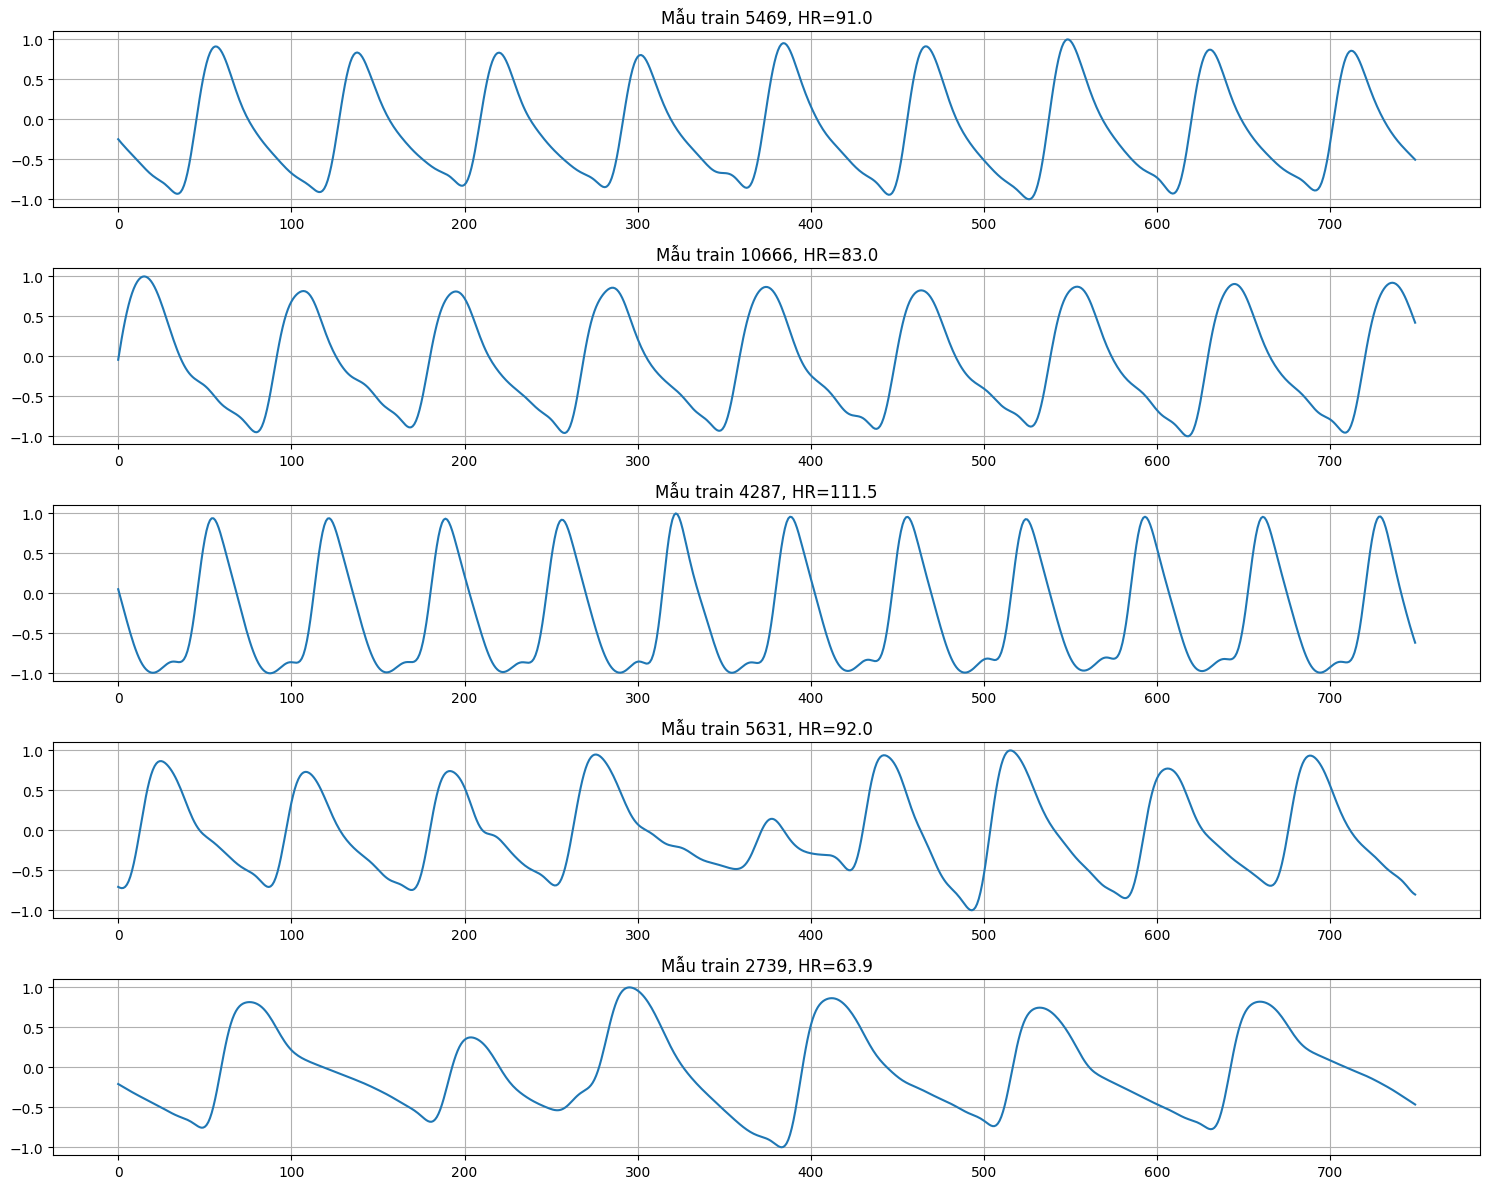

In [ ]:
# Vẽ một vài mẫu từ dữ liệu đã load
plt.figure(figsize=(15, 12))

# Vẽ 5 mẫu tín hiệu từ tập train
for i in range(5):
    idx = np.random.randint(0, X_train_loaded.shape[0])
    plt.subplot(5, 1, i+1)
    plt.plot(X_train_loaded[idx])
    plt.title(f'Mẫu train {idx}, HR={hr_raw_train_loaded[idx]:.1f}')
    plt.grid(True)

plt.tight_layout()
plt.show()

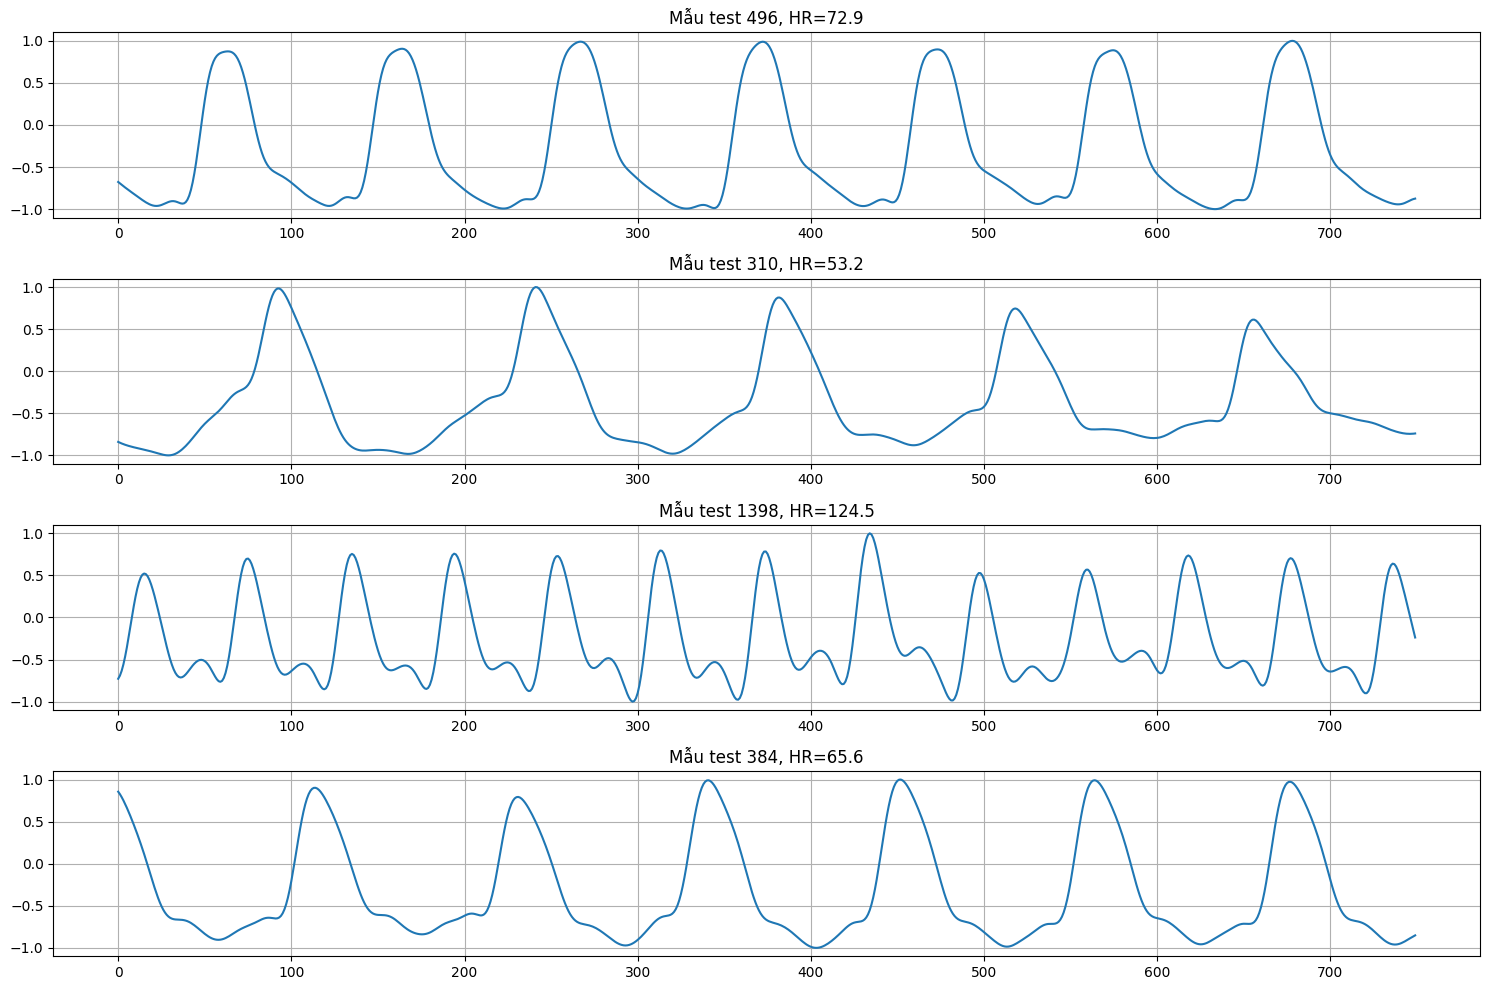

In [ ]:
# Vẽ một vài mẫu từ tập test
plt.figure(figsize=(15, 10))

# Vẽ 4 mẫu tín hiệu từ tập test
for i in range(4):
    idx = np.random.randint(0, X_test_loaded.shape[0])
    plt.subplot(4, 1, i+1)
    plt.plot(X_test_loaded[idx])
    plt.title(f'Mẫu test {idx}, HR={hr_raw_test_loaded[idx]:.1f}')
    plt.grid(True)

plt.tight_layout()
plt.show()

# **Model**

In [ ]:
# Kiểm tra và sửa lỗi kích thước mô hình
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat  # Thêm import loadmat từ scipy.io

# Load dữ liệu từ file .mat
print("Đang load dữ liệu từ file combined_data.mat...")
loaded_data = loadmat('/content/drive/MyDrive/cuoiky/combine/combined_data.mat')


Đang load dữ liệu từ file combined_data.mat...



Shape của dữ liệu đã load:
X_train_loaded shape: (11956, 750)
hr_raw_train_loaded shape: (11956,)
X_test_loaded shape: (2990, 750)
hr_raw_test_loaded shape: (2990,)
X_total_loaded shape: (14946, 750)
hr_raw_total_loaded shape: (14946,)

Thống kê HR raw total:
Min: 50.23, Max: 143.53
Mean: 86.85, Std: 17.46
Mean ± Std: 86.85 ± 17.46


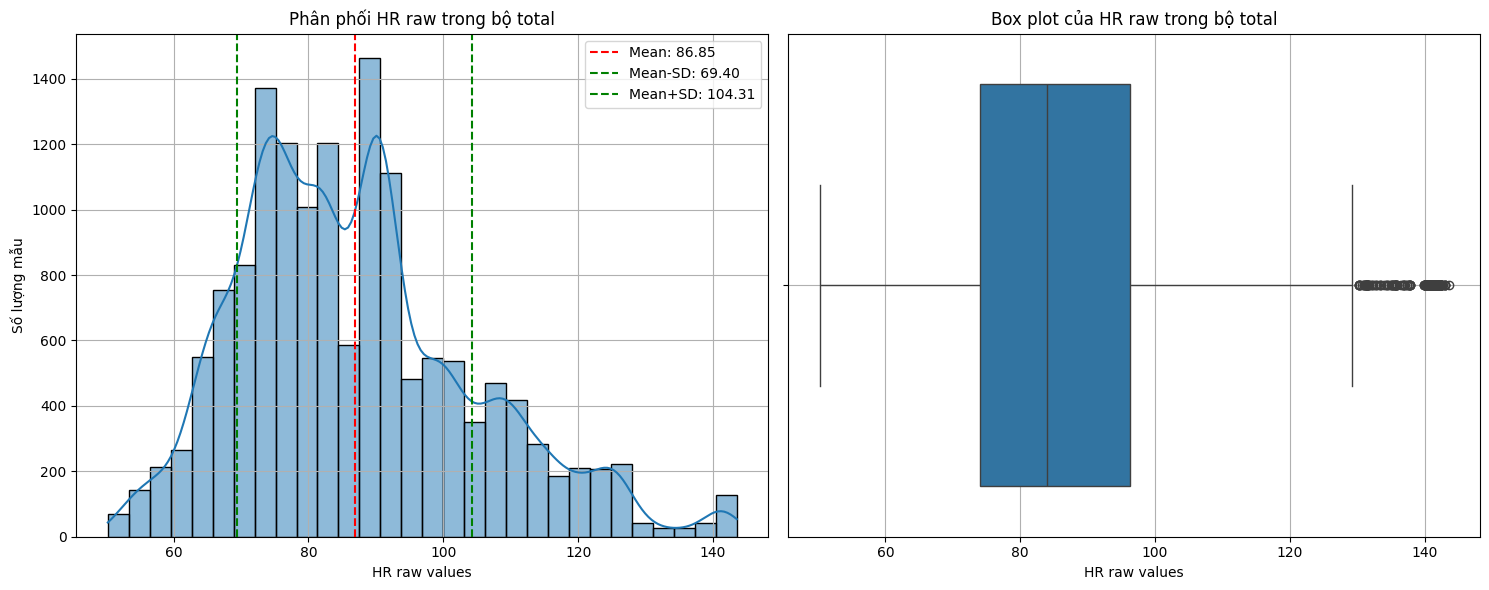

In [ ]:
# Trích xuất dữ liệu
X_train_loaded = loaded_data['X_train_norm']
X_test_loaded = loaded_data['X_test_norm']
hr_raw_train_loaded = loaded_data['hr_raw_train'].flatten()  # Flatten để chuyển từ (1, n) thành (n,)
hr_raw_test_loaded = loaded_data['hr_raw_test'].flatten()    # Flatten để chuyển từ (1, n) thành (n,)
X_total_loaded = loaded_data['X_total_norm']
hr_raw_total_loaded = loaded_data['hr_raw_total'].flatten()  # Flatten để chuyển từ (1, n) thành (n,)

# Kiểm tra kích thước dữ liệu đã load
print("\nShape của dữ liệu đã load:")
print(f"X_train_loaded shape: {X_train_loaded.shape}")
print(f"hr_raw_train_loaded shape: {hr_raw_train_loaded.shape}")
print(f"X_test_loaded shape: {X_test_loaded.shape}")
print(f"hr_raw_test_loaded shape: {hr_raw_test_loaded.shape}")
print(f"X_total_loaded shape: {X_total_loaded.shape}")
print(f"hr_raw_total_loaded shape: {hr_raw_total_loaded.shape}")

# Tính toán thống kê cho hr_raw_total_loaded
hr_raw_total_min = np.min(hr_raw_total_loaded)
hr_raw_total_max = np.max(hr_raw_total_loaded)
hr_raw_total_mean = np.mean(hr_raw_total_loaded)
hr_raw_total_std = np.std(hr_raw_total_loaded)

# In thống kê
print("\nThống kê HR raw total:")
print(f"Min: {hr_raw_total_min:.2f}, Max: {hr_raw_total_max:.2f}")
print(f"Mean: {hr_raw_total_mean:.2f}, Std: {hr_raw_total_std:.2f}")
print(f"Mean ± Std: {hr_raw_total_mean:.2f} ± {hr_raw_total_std:.2f}")

# Vẽ phân phối HR raw của bộ total
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(hr_raw_total_loaded, kde=True, bins=30)
plt.title('Phân phối HR raw trong bộ total')
plt.xlabel('HR raw values')
plt.ylabel('Số lượng mẫu')
plt.axvline(hr_raw_total_mean, color='r', linestyle='--', label=f'Mean: {hr_raw_total_mean:.2f}')
plt.axvline(hr_raw_total_mean - hr_raw_total_std, color='g', linestyle='--', label=f'Mean-SD: {hr_raw_total_mean - hr_raw_total_std:.2f}')
plt.axvline(hr_raw_total_mean + hr_raw_total_std, color='g', linestyle='--', label=f'Mean+SD: {hr_raw_total_mean + hr_raw_total_std:.2f}')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(x=hr_raw_total_loaded)
plt.title('Box plot của HR raw trong bộ total')
plt.xlabel('HR raw values')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Lọc dữ liệu nằm trong phạm vi mean ± 2*std của HR raw total
hr_raw_lower_bound = hr_raw_total_mean - 2 * hr_raw_total_std
hr_raw_upper_bound = hr_raw_total_mean + 2 * hr_raw_total_std

print(f"\nLọc dữ liệu trong khoảng HR raw: [{hr_raw_lower_bound:.2f}, {hr_raw_upper_bound:.2f}]")

# Tạo mask cho các mẫu nằm trong khoảng cho toàn bộ dữ liệu total
valid_mask_total = np.logical_and(
    hr_raw_total_loaded >= hr_raw_lower_bound,
    hr_raw_total_loaded <= hr_raw_upper_bound
)

# Lọc dữ liệu total
X_total_filtered = X_total_loaded[valid_mask_total]
hr_raw_total_filtered = hr_raw_total_loaded[valid_mask_total]

# Chuẩn hóa HR raw về khoảng [0, 1] dựa trên mean và std đã biết
hr_raw_mean = hr_raw_total_mean
hr_raw_std = hr_raw_total_std

# Hàm chuẩn hóa HR raw về khoảng [0, 1]
def normalize_hr_raw(hr_raw_data, mean=hr_raw_mean, std=hr_raw_std):
    # Sử dụng min-max normalization để scale về [0, 1]
    # Lấy giá trị min và max từ dữ liệu đã lọc
    hr_min = hr_raw_lower_bound  # Sử dụng giá trị biên dưới đã lọc
    hr_max = hr_raw_upper_bound  # Sử dụng giá trị biên trên đã lọc

    # Công thức chuẩn hóa min-max: (x - min) / (max - min)
    normalized = (hr_raw_data - hr_min) / (hr_max - hr_min)

    # Đảm bảo giá trị nằm trong khoảng [0, 1]
    normalized = np.clip(normalized, 0, 1)

    return normalized

# Áp dụng chuẩn hóa cho dữ liệu total đã lọc
hr_raw_total_normalized = normalize_hr_raw(hr_raw_total_filtered)


Lọc dữ liệu trong khoảng HR raw: [51.94, 121.77]



Thống kê HR raw total sau khi chuẩn hóa:
Min: 0.0002, Max: 0.9997
Mean: 0.4711, Std: 0.2128


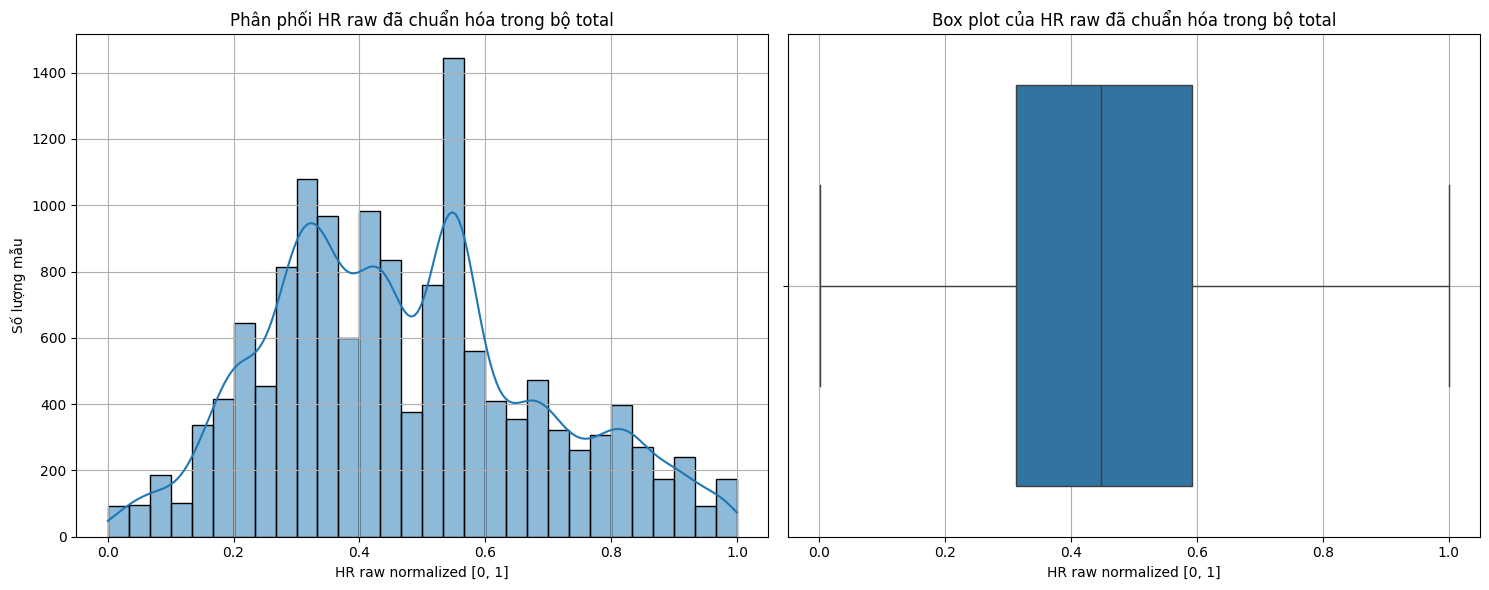

In [ ]:
# Kiểm tra kết quả chuẩn hóa
print("\nThống kê HR raw total sau khi chuẩn hóa:")
print(f"Min: {np.min(hr_raw_total_normalized):.4f}, Max: {np.max(hr_raw_total_normalized):.4f}")
print(f"Mean: {np.mean(hr_raw_total_normalized):.4f}, Std: {np.std(hr_raw_total_normalized):.4f}")

# Vẽ phân phối HR raw sau khi chuẩn hóa
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(hr_raw_total_normalized, kde=True, bins=30)
plt.title('Phân phối HR raw đã chuẩn hóa trong bộ total')
plt.xlabel('HR raw normalized [0, 1]')
plt.ylabel('Số lượng mẫu')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(x=hr_raw_total_normalized)
plt.title('Box plot của HR raw đã chuẩn hóa trong bộ total')
plt.xlabel('HR raw normalized [0, 1]')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Chia lại thành tập train và test từ dữ liệu total đã lọc và chuẩn hóa
from sklearn.model_selection import train_test_split

# Sử dụng tỷ lệ 80% train, 20% test
X_train_filtered, X_test_filtered, hr_raw_train_normalized, hr_raw_test_normalized = train_test_split(
    X_total_filtered, hr_raw_total_normalized, test_size=0.2, random_state=42
)

# Lấy giá trị HR raw gốc tương ứng cho việc hiển thị
train_indices = np.arange(len(X_total_filtered))
train_indices, test_indices = train_test_split(
    train_indices, test_size=0.2, random_state=42
)
hr_raw_train_filtered = hr_raw_total_filtered[train_indices]
hr_raw_test_filtered = hr_raw_total_filtered[test_indices]

Số mẫu train ban đầu: 11956
Số mẫu train sau khi lọc: 11376
Tỷ lệ giữ lại (train): 95.15%
Số mẫu test ban đầu: 2990
Số mẫu test sau khi lọc: 2845
Tỷ lệ giữ lại (test): 95.15%

Thống kê HR raw sau khi chia tập:
Train - Min: 0.0002, Max: 0.9997
Train - Mean: 0.4701, Std: 0.2132
Test - Min: 0.0045, Max: 0.9985
Test - Mean: 0.4750, Std: 0.2112


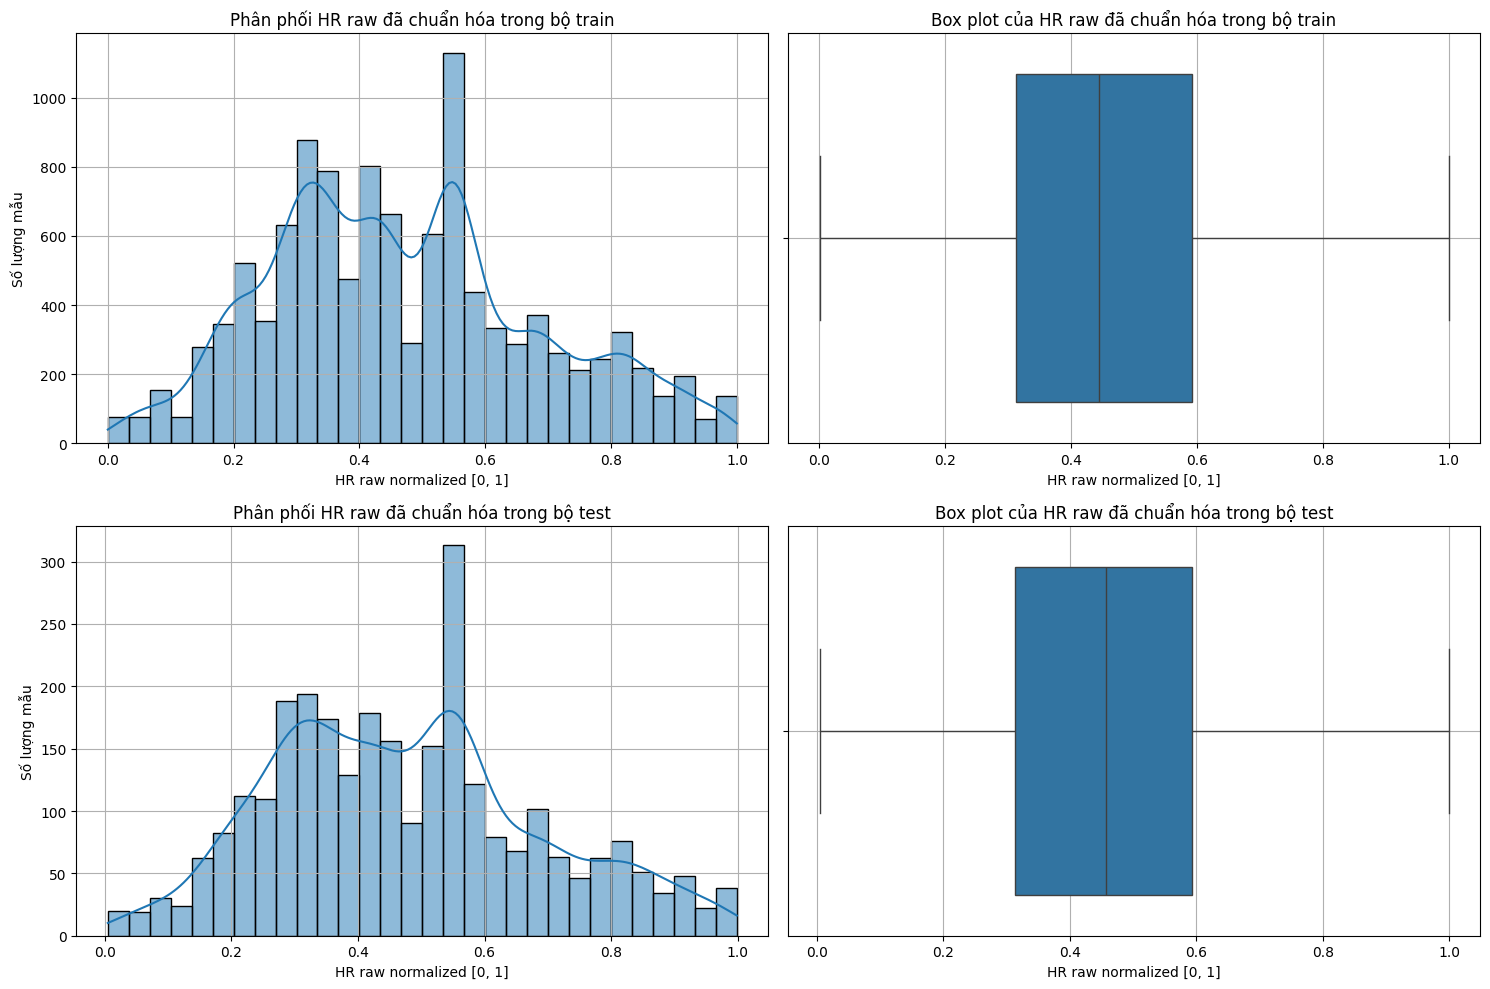

In [ ]:
# In thông tin về số lượng mẫu đã lọc
print(f"Số mẫu train ban đầu: {X_train_loaded.shape[0]}")
print(f"Số mẫu train sau khi lọc: {X_train_filtered.shape[0]}")
print(f"Tỷ lệ giữ lại (train): {X_train_filtered.shape[0]/X_train_loaded.shape[0]*100:.2f}%")

print(f"Số mẫu test ban đầu: {X_test_loaded.shape[0]}")
print(f"Số mẫu test sau khi lọc: {X_test_filtered.shape[0]}")
print(f"Tỷ lệ giữ lại (test): {X_test_filtered.shape[0]/X_test_loaded.shape[0]*100:.2f}%")

# Kiểm tra thống kê HR raw sau khi chia tập
print("\nThống kê HR raw sau khi chia tập:")
print(f"Train - Min: {np.min(hr_raw_train_normalized):.4f}, Max: {np.max(hr_raw_train_normalized):.4f}")
print(f"Train - Mean: {np.mean(hr_raw_train_normalized):.4f}, Std: {np.std(hr_raw_train_normalized):.4f}")
print(f"Test - Min: {np.min(hr_raw_test_normalized):.4f}, Max: {np.max(hr_raw_test_normalized):.4f}")
print(f"Test - Mean: {np.mean(hr_raw_test_normalized):.4f}, Std: {np.std(hr_raw_test_normalized):.4f}")

# Vẽ phân phối HR raw sau khi chia tập
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(hr_raw_train_normalized, kde=True, bins=30)
plt.title('Phân phối HR raw đã chuẩn hóa trong bộ train')
plt.xlabel('HR raw normalized [0, 1]')
plt.ylabel('Số lượng mẫu')
plt.grid(True)

plt.subplot(2, 2, 2)
sns.boxplot(x=hr_raw_train_normalized)
plt.title('Box plot của HR raw đã chuẩn hóa trong bộ train')
plt.xlabel('HR raw normalized [0, 1]')
plt.grid(True)

plt.subplot(2, 2, 3)
sns.histplot(hr_raw_test_normalized, kde=True, bins=30)
plt.title('Phân phối HR raw đã chuẩn hóa trong bộ test')
plt.xlabel('HR raw normalized [0, 1]')
plt.ylabel('Số lượng mẫu')
plt.grid(True)

plt.subplot(2, 2, 4)
sns.boxplot(x=hr_raw_test_normalized)
plt.title('Box plot của HR raw đã chuẩn hóa trong bộ test')
plt.xlabel('HR raw normalized [0, 1]')
plt.grid(True)

plt.tight_layout()
plt.show()

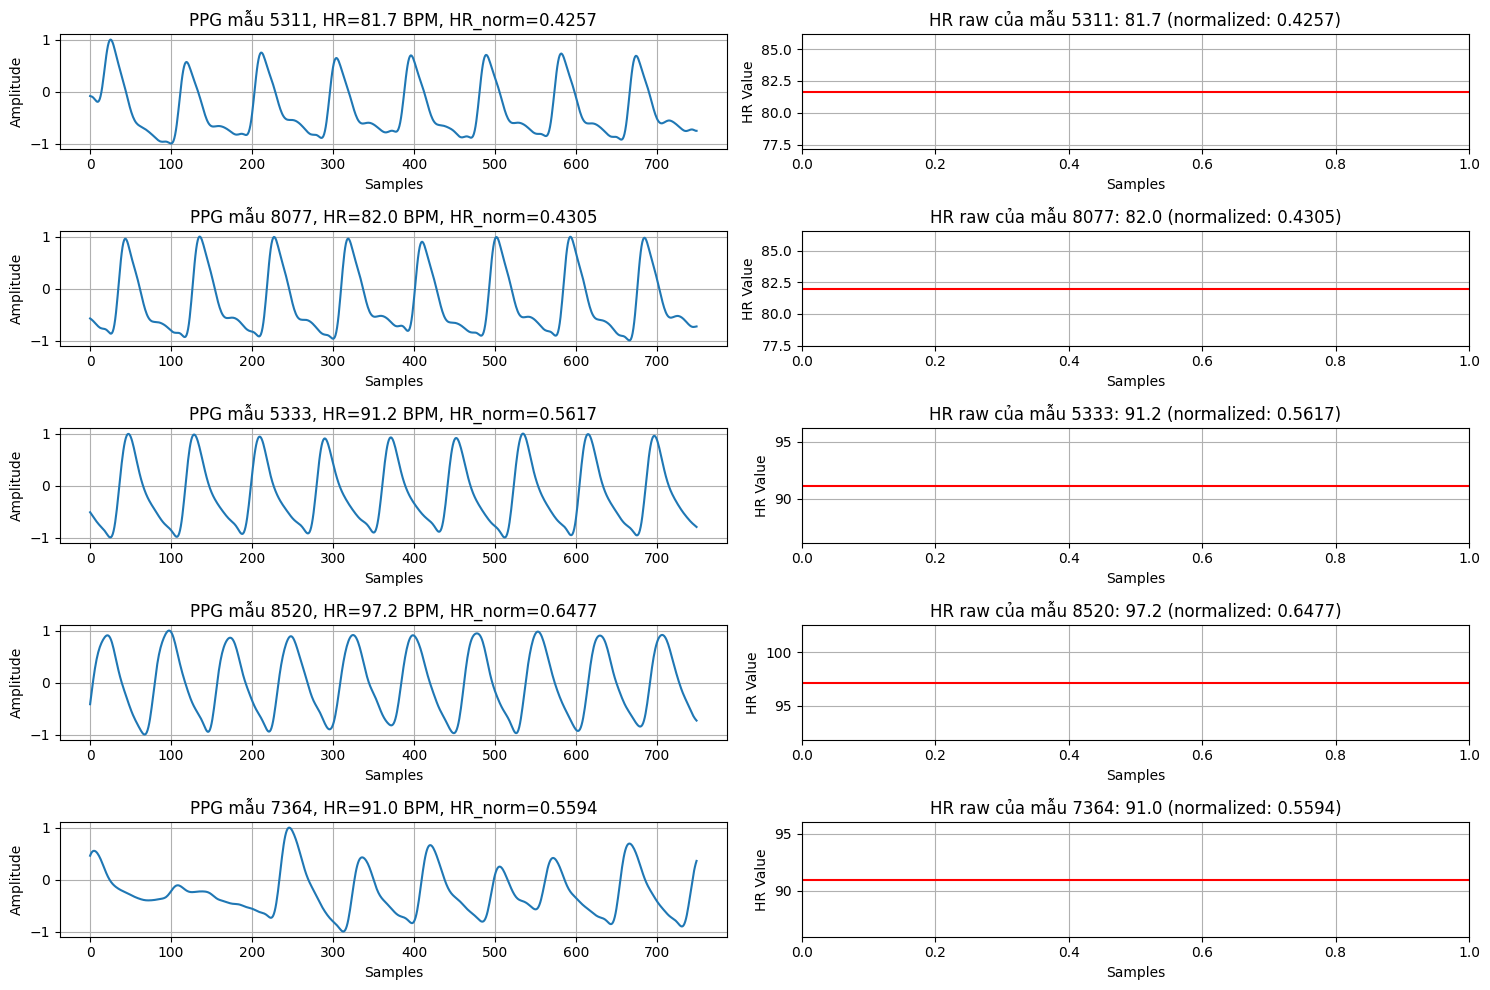

In [ ]:
# Vẽ một vài mẫu để double check
plt.figure(figsize=(15, 10))
for i in range(5):
    idx = np.random.randint(0, X_train_filtered.shape[0])

    # Vẽ tín hiệu PPG
    plt.subplot(5, 2, i*2+1)
    plt.plot(X_train_filtered[idx])
    plt.title(f'PPG mẫu {idx}, HR={hr_raw_train_filtered[idx]:.1f} BPM, HR_norm={hr_raw_train_normalized[idx]:.4f}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.grid(True)

    # Vẽ tín hiệu HR raw tương ứng
    plt.subplot(5, 2, i*2+2)
    plt.axhline(hr_raw_train_filtered[idx], color='r')
    plt.title(f'HR raw của mẫu {idx}: {hr_raw_train_filtered[idx]:.1f} (normalized: {hr_raw_train_normalized[idx]:.4f})')
    plt.xlabel('Samples')
    plt.ylabel('HR Value')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Thiết lập device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Sử dụng device: {device}")

# Chuyển đổi dữ liệu đã lọc và chuẩn hóa thành tensor
X_train_tensor = torch.FloatTensor(X_train_filtered)
hr_raw_train_tensor = torch.FloatTensor(hr_raw_train_normalized.reshape(-1, 1))  # Reshape để có shape (n, 1)

X_test_tensor = torch.FloatTensor(X_test_filtered)
hr_raw_test_tensor = torch.FloatTensor(hr_raw_test_normalized.reshape(-1, 1))  # Reshape để có shape (n, 1)

# Tạo dataset và dataloader
train_dataset = TensorDataset(X_train_tensor, hr_raw_train_tensor)
test_dataset = TensorDataset(X_test_tensor, hr_raw_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Sử dụng device: cuda


In [ ]:
# Lưu dữ liệu đã xử lý vào file .mat
import scipy.io as sio
data_to_save = {
    'X_train_filtered': X_train_filtered,
    'hr_raw_train_normalized': hr_raw_train_normalized,
    'X_test_filtered': X_test_filtered,
    'hr_raw_test_normalized': hr_raw_test_normalized
}
sio.savemat('final_combined_data.mat', data_to_save)
print("Đã lưu dữ liệu vào file final_combined_data.mat thành công!")

# Kiểm tra kích thước dữ liệu
print(f"X_train_filtered shape: {X_train_filtered.shape}")
print(f"hr_raw_train_normalized shape: {hr_raw_train_normalized.shape}")
print(f"X_test_filtered shape: {X_test_filtered.shape}")
print(f"hr_raw_test_normalized shape: {hr_raw_test_normalized.shape}")

# Kiểm tra kích thước dữ liệu trong dataloader
sample_data, sample_condition = next(iter(train_loader))
print(f"Batch data shape: {sample_data.shape}")
print(f"Batch condition shape: {sample_condition.shape}")

Đã lưu dữ liệu vào file final_combined_data.mat thành công!
X_train_filtered shape: (11376, 750)
hr_raw_train_normalized shape: (11376,)
X_test_filtered shape: (2845, 750)
hr_raw_test_normalized shape: (2845,)
Batch data shape: torch.Size([64, 750])
Batch condition shape: torch.Size([64, 1])


In [ ]:
X_train_loaded = loaded_data['X_train_norm']
X_test_loaded = loaded_data['X_test_norm']
hr_raw_train_loaded = loaded_data['hr_raw_train'].flatten()
hr_raw_test_loaded = loaded_data['hr_raw_test'].flatten()
X_total_loaded = loaded_data['X_total_norm']
hr_raw_total_loaded = loaded_data['hr_raw_total'].flatten()

hr_raw_total_mean = np.mean(hr_raw_total_loaded)
hr_raw_total_std = np.std(hr_raw_total_loaded)
hr_raw_lower_bound = hr_raw_total_mean - 2 * hr_raw_total_std
hr_raw_upper_bound = hr_raw_total_mean + 2 * hr_raw_total_std

valid_mask_total = np.logical_and(
    hr_raw_total_loaded >= hr_raw_lower_bound,
    hr_raw_total_loaded <= hr_raw_upper_bound
)
X_total_filtered = X_total_loaded[valid_mask_total]
hr_raw_total_filtered = hr_raw_total_loaded[valid_mask_total]

def normalize_hr_raw(hr_raw_data, min_hr=hr_raw_lower_bound, max_hr=hr_raw_upper_bound):
    normalized = (hr_raw_data - min_hr) / (max_hr - min_hr)
    normalized = np.clip(normalized, 0, 1)
    return normalized

hr_raw_total_normalized = normalize_hr_raw(hr_raw_total_filtered)

from sklearn.model_selection import train_test_split
X_train_filtered, X_test_filtered, hr_raw_train_normalized, hr_raw_test_normalized = train_test_split(
    X_total_filtered, hr_raw_total_normalized, test_size=0.2, random_state=42
)
train_indices = np.arange(len(X_total_filtered))
train_indices, test_indices = train_test_split(
    train_indices, test_size=0.2, random_state=42
)
hr_raw_train_filtered = hr_raw_total_filtered[train_indices]
hr_raw_test_filtered = hr_raw_total_filtered[test_indices]

print(f"PPG min: {X_train_filtered.min()}, max: {X_train_filtered.max()}")
if X_train_filtered.max() <= 1.0 and X_train_filtered.min() >= 0.0:
    print("Chuẩn hóa PPG từ [0, 1] về [-1, 1]")
    X_train_filtered = X_train_filtered * 2 - 1
    X_test_filtered = X_test_filtered * 2 - 1

X_train_tensor = torch.FloatTensor(X_train_filtered)
hr_raw_train_tensor = torch.FloatTensor(hr_raw_train_normalized.reshape(-1, 1))
X_test_tensor = torch.FloatTensor(X_test_filtered)
hr_raw_test_tensor = torch.FloatTensor(hr_raw_test_normalized.reshape(-1, 1))

batch_size = 32  # Giảm từ 64
train_dataset = TensorDataset(X_train_tensor, hr_raw_train_tensor)
test_dataset = TensorDataset(X_test_tensor, hr_raw_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Sử dụng device: {device}")

PPG min: -1.0, max: 1.0000000000000004
Sử dụng device: cuda


In [ ]:
# Thiết lập tham số mô hình
input_size = X_train_filtered.shape[1]  # 750
condition_size = 1
noise_dim = 128

In [ ]:
# Định nghĩa Generator với Conv1D
class Generator(nn.Module):
    def __init__(self, noise_dim, condition_dim, output_dim):
        super(Generator, self).__init__()
        self.input_layer = nn.Linear(noise_dim + condition_dim, 128 * 4)
        self.conv_layers = nn.Sequential(
            nn.ConvTranspose1d(128, 64, kernel_size=4, stride=2, padding=1),  # [128, 4] -> [64, 8]
            nn.BatchNorm1d(64),
            nn.LeakyReLU(0.2),
            nn.ConvTranspose1d(64, 32, kernel_size=4, stride=2, padding=1),  # [64, 8] -> [32, 16]
            nn.BatchNorm1d(32),
            nn.LeakyReLU(0.2),
            nn.ConvTranspose1d(32, 16, kernel_size=4, stride=2, padding=1),  # [32, 16] -> [16, 32]
            nn.BatchNorm1d(16),
            nn.LeakyReLU(0.2),
            nn.ConvTranspose1d(16, 1, kernel_size=39, stride=23, padding=1),  # [16, 32] -> [1, 750]
        )
        self.output_layer = nn.Tanh()

    def forward(self, z, condition):
        x_combined = torch.cat([z, condition], dim=1)
        x = self.input_layer(x_combined)
        x = x.view(-1, 128, 4)
        x = self.conv_layers(x)
        x = self.output_layer(x)
        return x.squeeze(1)  # [batch_size, 750]

In [ ]:
# Định nghĩa Discriminator với Conv1D và Spectral Normalization
class Discriminator(nn.Module):
    def __init__(self, input_dim, condition_dim):
        super(Discriminator, self).__init__()
        self.condition_embed = nn.Linear(condition_dim, 16)
        self.conv_layers = nn.Sequential(
            nn.utils.spectral_norm(nn.Conv1d(1 + 16, 32, kernel_size=4, stride=2, padding=1)),  # [17, 750] -> [32, 375]
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.utils.spectral_norm(nn.Conv1d(32, 64, kernel_size=4, stride=2, padding=1)),  # [32, 375] -> [64, 187]
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.utils.spectral_norm(nn.Conv1d(64, 128, kernel_size=4, stride=2, padding=1)),  # [64, 187] -> [128, 93]
            nn.LeakyReLU(0.2),
            nn.AdaptiveAvgPool1d(93),  # Cố định chiều dài đầu ra thành 93
        )
        self.output_layer = nn.Linear(128 * 93, 1)
        # Bỏ self.sigmoid vì BCEWithLogitsLoss sẽ xử lý sigmoid

    def forward(self, x, condition):
        condition_embedded = self.condition_embed(condition)
        condition_expanded = condition_embedded.unsqueeze(-1).repeat(1, 1, x.size(-1))
        x = x.unsqueeze(1)
        x_combined = torch.cat([x, condition_expanded], dim=1)
        x = self.conv_layers(x_combined)
        x = x.view(x.size(0), -1)
        x = self.output_layer(x)
        return x  # Trả về logits, không áp dụng sigmoid

In [ ]:
# Xây dựng CGAN
class CGAN(nn.Module):
    def __init__(self, generator, discriminator):
        super(CGAN, self).__init__()
        self.generator = generator
        self.discriminator = discriminator

    def forward(self, x, condition):
        batch_size = x.size(0)
        z = torch.randn(batch_size, noise_dim).to(x.device)
        fake = self.generator(z, condition)
        real_pred = self.discriminator(x, condition)
        fake_pred = self.discriminator(fake, condition)
        return fake, real_pred, fake_pred

    def generate(self, condition, z=None):
        if z is None:
            batch_size = condition.size(0)
            z = torch.randn(batch_size, noise_dim).to(condition.device)
        return self.generator(z, condition)



In [ ]:
# Khởi tạo mô hình
generator = Generator(noise_dim, condition_size, input_size)
discriminator = Discriminator(input_size, condition_size)
cgan = CGAN(generator, discriminator)

# Chuyển mô hình sang device
cgan.to(device)

CGAN(
  (generator): Generator(
    (input_layer): Linear(in_features=129, out_features=512, bias=True)
    (conv_layers): Sequential(
      (0): ConvTranspose1d(128, 64, kernel_size=(4,), stride=(2,), padding=(1,))
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
      (3): ConvTranspose1d(64, 32, kernel_size=(4,), stride=(2,), padding=(1,))
      (4): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): LeakyReLU(negative_slope=0.2)
      (6): ConvTranspose1d(32, 16, kernel_size=(4,), stride=(2,), padding=(1,))
      (7): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): LeakyReLU(negative_slope=0.2)
      (9): ConvTranspose1d(16, 1, kernel_size=(39,), stride=(23,), padding=(1,))
    )
    (output_layer): Tanh()
  )
  (discriminator): Discriminator(
    (condition_embed): Linear(in_features=1, out_features=16, bias=True)
   

In [ ]:
# Hiển thị cấu trúc mô hình
print("\n=== Cấu trúc Generator ===")
print(generator)
print("\n=== Cấu trúc Discriminator ===")
print(discriminator)
print("\n=== Cấu trúc CGAN ===")
print(cgan)

# Tính tổng số tham số của mô hình
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\nTổng số tham số của Generator: {count_parameters(generator):,}")
print(f"Tổng số tham số của Discriminator: {count_parameters(discriminator):,}")
print(f"Tổng số tham số của CGAN: {count_parameters(cgan):,}")




=== Cấu trúc Generator ===
Generator(
  (input_layer): Linear(in_features=129, out_features=512, bias=True)
  (conv_layers): Sequential(
    (0): ConvTranspose1d(128, 64, kernel_size=(4,), stride=(2,), padding=(1,))
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
    (3): ConvTranspose1d(64, 32, kernel_size=(4,), stride=(2,), padding=(1,))
    (4): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): ConvTranspose1d(32, 16, kernel_size=(4,), stride=(2,), padding=(1,))
    (7): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.2)
    (9): ConvTranspose1d(16, 1, kernel_size=(39,), stride=(23,), padding=(1,))
  )
  (output_layer): Tanh()
)

=== Cấu trúc Discriminator ===
Discriminator(
  (condition_embed): Linear(in_features=1, out_features=16, bias=True)
  (conv_layers)

In [ ]:
# Trực quan hóa flow của dữ liệu qua mô hình
def visualize_model_flow():
    print(f"\nInput shape: {sample_data[0:1].shape}, Condition shape: {sample_condition[0:1].shape}")
    batch_size = sample_data[0:1].size(0)
    z = torch.randn(batch_size, noise_dim).to(device)
    print(f"Noise z shape: {z.shape}")
    z_combined = torch.cat([z, sample_condition[0:1].to(device)], dim=1)
    print(f"Combined input shape (z + condition): {z_combined.shape}")

    # Chuyển Generator sang chế độ đánh giá
    generator.eval()
    with torch.no_grad():
        fake = generator(z, sample_condition[0:1].to(device))
    print(f"Generated fake PPG shape: {fake.shape}")

    # Chuyển Discriminator sang chế độ đánh giá
    discriminator.eval()
    with torch.no_grad():
        real_pred = discriminator(sample_data[0:1].to(device), sample_condition[0:1].to(device))
        print(f"Discriminator real prediction shape: {real_pred.shape}")
        fake_pred = discriminator(fake, sample_condition[0:1].to(device))
        print(f"Discriminator fake prediction shape: {fake_pred.shape}")

    # Khôi phục chế độ huấn luyện
    generator.train()
    discriminator.train()

# Gọi hàm để kiểm tra
visualize_model_flow()


Input shape: torch.Size([1, 750]), Condition shape: torch.Size([1, 1])
Noise z shape: torch.Size([1, 128])
Combined input shape (z + condition): torch.Size([1, 129])
Generated fake PPG shape: torch.Size([1, 750])
Discriminator real prediction shape: torch.Size([1, 1])
Discriminator fake prediction shape: torch.Size([1, 1])


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.cuda.amp import GradScaler, autocast  # Thêm import autocast

In [ ]:
# Định nghĩa các tham số
noise_dim = 128
condition_size = 1
learning_rate = 0.00005
batch_size = 32
epochs = 600
beta1 = 0.5
lambda_gp = 2
n_critic = 3

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Sử dụng thiết bị: {device}")

cgan = cgan.to(device)

Sử dụng thiết bị: cuda


In [ ]:
optimizer_G = optim.Adam(cgan.generator.parameters(), lr=learning_rate, betas=(beta1, 0.999))
optimizer_D = optim.Adam(cgan.discriminator.parameters(), lr=learning_rate, betas=(beta1, 0.999))
scheduler_G = ReduceLROnPlateau(optimizer_G, mode='min', factor=0.5, patience=20)
scheduler_D = ReduceLROnPlateau(optimizer_D, mode='min', factor=0.5, patience=20)

criterion = nn.BCEWithLogitsLoss()  # Thay BCELoss bằng BCEWithLogitsLoss

# Hàm tính gradient penalty (chỉ tính mỗi 10 batch)
def compute_gradient_penalty(discriminator, real_data, fake_data, condition, device, batch_idx):
    if batch_idx % 10 != 0:  # Chỉ tính mỗi 10 batch
        return torch.tensor(0.0, device=device)
    batch_size = real_data.size(0)
    alpha = torch.rand(batch_size, 1, device=device)
    alpha = alpha.expand(real_data.size())
    interpolates = alpha * real_data + (1 - alpha) * fake_data
    interpolates = interpolates.requires_grad_(True)
    disc_interpolates = discriminator(interpolates, condition)
    gradients = torch.autograd.grad(
        outputs=disc_interpolates,
        inputs=interpolates,
        grad_outputs=torch.ones_like(disc_interpolates),
        create_graph=True,
        retain_graph=True,
        only_inputs=True
    )[0]
    gradients = gradients.view(batch_size, -1)
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean() * lambda_gp
    return gradient_penalty

g_losses = []
d_losses = []
best_g_loss = float('inf')
best_epoch = 0
patience = 30
patience_counter = 0

checkpoint_dir = 'checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

In [ ]:
for epoch in range(epochs):
    cgan.train()
    total_g_loss = 0
    total_d_loss = 0

    # Label smoothing động
    real_label_value = max(0.7, 0.9 - (epoch * 0.002))  # Giảm từ 0.9 xuống 0.7

    for batch_idx, (data, condition) in enumerate(train_loader):
        data = data.to(device)
        hr_condition = condition.to(device)
        batch_size = data.size(0)

        real_label = torch.full((batch_size, 1), real_label_value, device=device)
        fake_label = torch.zeros(batch_size, 1, device=device)

        # Huấn luyện Discriminator
        for _ in range(n_critic):
            optimizer_D.zero_grad()
            real_pred = cgan.discriminator(data, hr_condition)
            d_loss_real = criterion(real_pred, real_label)
            z = torch.randn(batch_size, noise_dim, device=device)
            fake = cgan.generator(z, hr_condition)
            fake_pred = cgan.discriminator(fake.detach(), hr_condition)
            d_loss_fake = criterion(fake_pred, fake_label)
            gp = compute_gradient_penalty(cgan.discriminator, data, fake.detach(), hr_condition, device, batch_idx)
            d_loss = (d_loss_real + d_loss_fake) / 2 + gp
            d_loss.backward()
            optimizer_D.step()

        total_d_loss += d_loss.item() * batch_size

        # Huấn luyện Generator
        optimizer_G.zero_grad()
        fake_pred = cgan.discriminator(fake, hr_condition)
        g_loss = criterion(fake_pred, real_label)
        g_loss.backward()
        optimizer_G.step()

        torch.nn.utils.clip_grad_norm_(cgan.generator.parameters(), max_norm=1.0)
        torch.nn.utils.clip_grad_norm_(cgan.discriminator.parameters(), max_norm=1.0)

        total_g_loss += g_loss.item() * batch_size

    avg_g_loss = total_g_loss / len(train_loader.dataset)
    avg_d_loss = total_d_loss / len(train_loader.dataset)

    g_losses.append(avg_g_loss)
    d_losses.append(avg_d_loss)

    scheduler_G.step(avg_g_loss)
    scheduler_D.step(avg_d_loss)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs}")
        print(f"Generator Loss: {avg_g_loss:.4f}, Discriminator Loss: {avg_d_loss:.4f}")

    if epoch % 50 == 0:
        checkpoint_path = os.path.join(checkpoint_dir, f'cgan_checkpoint_epoch_{epoch}.pth')
        torch.save({
            'epoch': epoch,
            'generator_state_dict': cgan.generator.state_dict(),
            'discriminator_state_dict': cgan.discriminator.state_dict(),
            'optimizer_G_state_dict': optimizer_G.state_dict(),
            'optimizer_D_state_dict': optimizer_D.state_dict(),
            'scheduler_G_state_dict': scheduler_G.state_dict(),
            'scheduler_D_state_dict': scheduler_D.state_dict(),
            'g_loss': avg_g_loss,
            'd_loss': avg_d_loss,
            'g_losses': g_losses,
            'd_losses': d_losses
        }, checkpoint_path)

    if avg_g_loss < best_g_loss:
        best_g_loss = avg_g_loss
        best_epoch = epoch
        best_model_path = 'best_cgan_combined.pth'
        torch.save({
            'epoch': epoch,
            'generator_state_dict': cgan.generator.state_dict(),
            'discriminator_state_dict': cgan.discriminator.state_dict(),
            'optimizer_G_state_dict': optimizer_G.state_dict(),
            'optimizer_D_state_dict': optimizer_D.state_dict(),
            'g_loss': avg_g_loss,
            'd_loss': avg_d_loss
        }, best_model_path)
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter >= patience and epoch >= 300:
        print(f"Early stopping tại epoch {epoch} vì không có cải thiện sau {patience} epochs")
        break

history = {
    'g_losses': g_losses,
    'd_losses': d_losses,
    'best_epoch': best_epoch
}
torch.save(history, 'training_history_cgan_combined.pth')

print("Huấn luyện hoàn tất!")

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at /pytorch/aten/src/ATen/cuda/CublasHandlePool.cpp:180.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 0/600
Generator Loss: 2.4906, Discriminator Loss: 0.3752
Epoch 10/600
Generator Loss: 1.2767, Discriminator Loss: 0.4695
Epoch 20/600
Generator Loss: 1.0060, Discriminator Loss: 0.5880
Epoch 30/600
Generator Loss: 0.9384, Discriminator Loss: 0.6232
Epoch 40/600
Generator Loss: 0.9112, Discriminator Loss: 0.6310
Epoch 50/600
Generator Loss: 0.9021, Discriminator Loss: 0.6367
Epoch 60/600
Generator Loss: 0.8912, Discriminator Loss: 0.6433
Epoch 70/600
Generator Loss: 0.8898, Discriminator Loss: 0.6420
Epoch 80/600
Generator Loss: 0.8889, Discriminator Loss: 0.6407
Epoch 90/600
Generator Loss: 0.8892, Discriminator Loss: 0.6370
Epoch 100/600
Generator Loss: 0.8898, Discriminator Loss: 0.6330
Epoch 110/600
Generator Loss: 0.8887, Discriminator Loss: 0.6332
Epoch 120/600
Generator Loss: 0.8884, Discriminator Loss: 0.6334
Epoch 130/600
Generator Loss: 0.8871, Discriminator Loss: 0.6337
Epoch 140/600
Generator Loss: 0.8869, Discriminator Loss: 0.6349
Epoch 150/600
Generator Loss: 0.8858

# **Đánh giá mô hình**

In [ ]:
# Hàm giải chuẩn hóa HR
def denormalize_hr(normalized_hr, min_hr=hr_raw_lower_bound, max_hr=hr_raw_upper_bound):
    return normalized_hr * (max_hr - min_hr) + min_hr

# Hàm tạo sinh PPG
def evaluate_generation(cgan, hr_condition, device):
    cgan.eval()
    with torch.no_grad():
        if isinstance(hr_condition, torch.Tensor):
            hr_condition = hr_condition.view(1, 1).float().to(device)
        else:
            hr_condition = torch.tensor([[hr_condition]], dtype=torch.float).to(device)
        generated = cgan.generate(hr_condition)
    return generated

Generator output shape: torch.Size([1, 750])


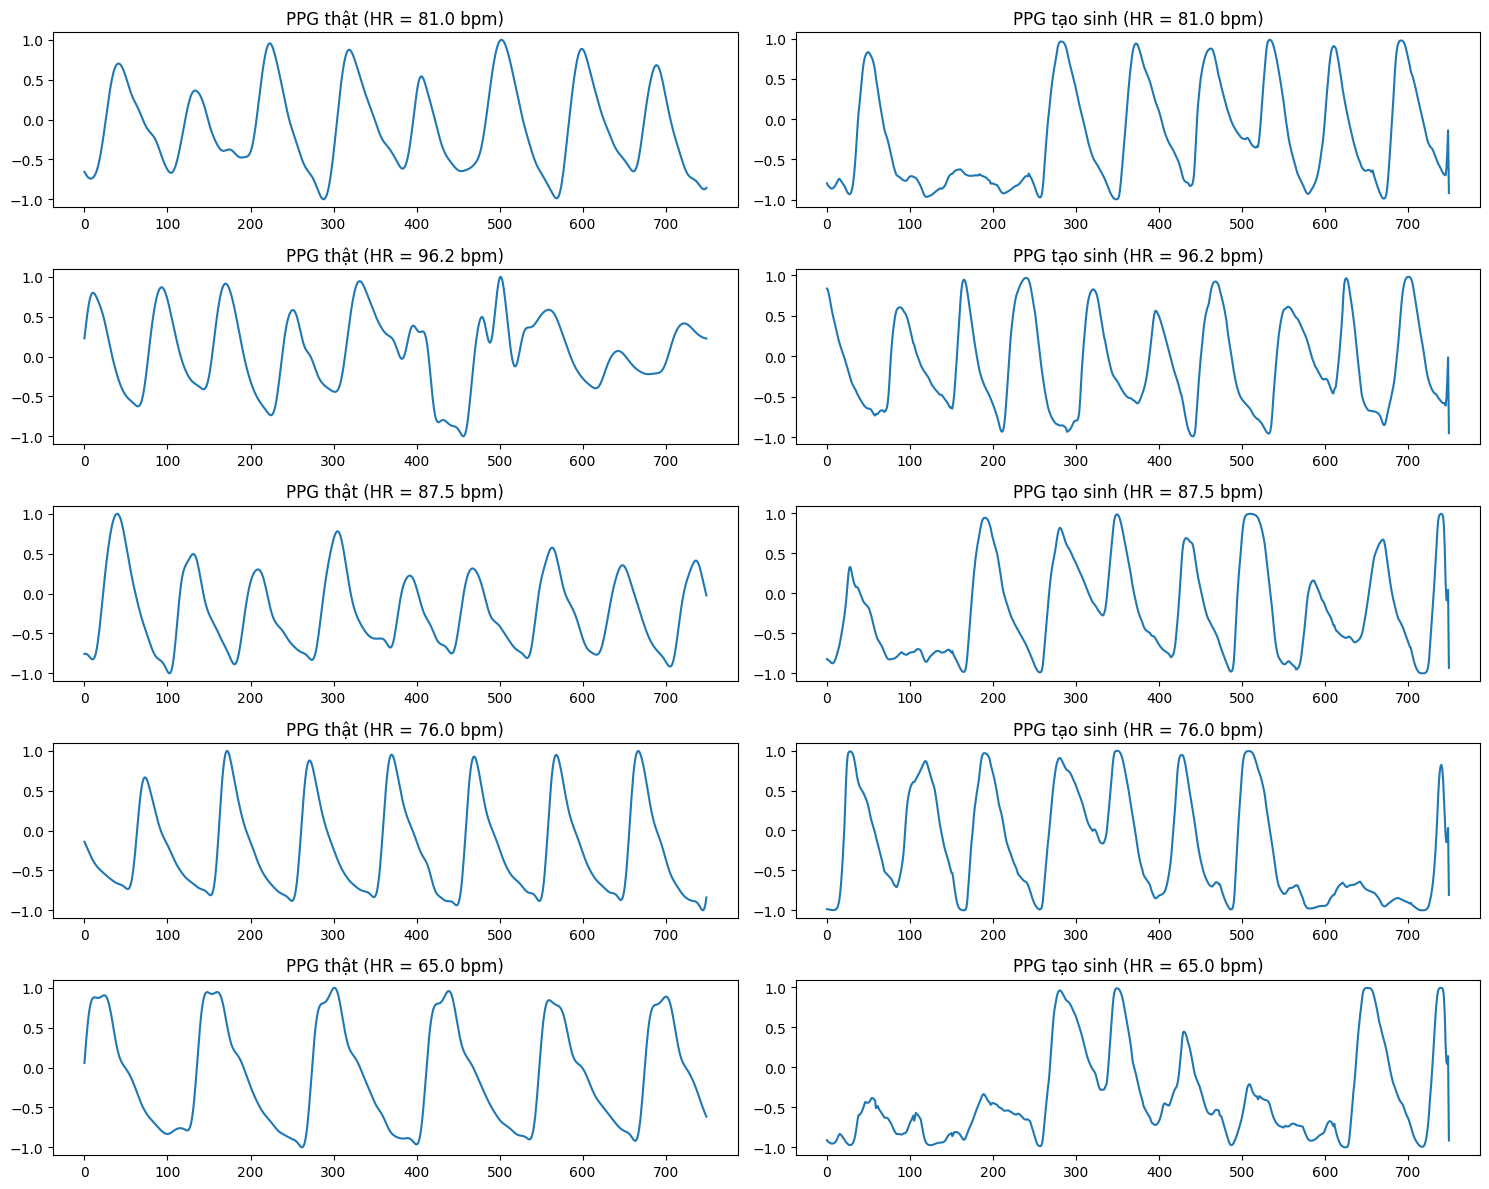

In [ ]:
# Kiểm tra mô hình
print(f"Generator output shape: {cgan.generator(torch.randn(1, noise_dim).to(device), torch.randn(1, condition_size).to(device)).shape}")

# Lấy mẫu từ tập test
n_samples = 5
test_samples = []
test_conditions = []

for i, (data, condition) in enumerate(test_loader):
    if i >= n_samples:
        break
    test_samples.append(data[0])
    test_conditions.append(condition[0])

# Tạo sinh PPG
generated_samples = []
for hr_condition in test_conditions:
    generated = evaluate_generation(cgan, hr_condition, device)
    generated_samples.append(generated.cpu().squeeze(0))

# Vẽ đồ thị
plt.figure(figsize=(15, 12))

for i in range(n_samples):
    actual_hr = denormalize_hr(test_conditions[i].item())
    plt.subplot(n_samples, 2, 2*i+1)
    plt.plot(test_samples[i].cpu().numpy())
    plt.title(f'PPG thật (HR = {actual_hr:.1f} bpm)')
    plt.subplot(n_samples, 2, 2*i+2)
    plt.plot(generated_samples[i].numpy())
    plt.title(f'PPG tạo sinh (HR = {actual_hr:.1f} bpm)')

plt.tight_layout()
plt.show()

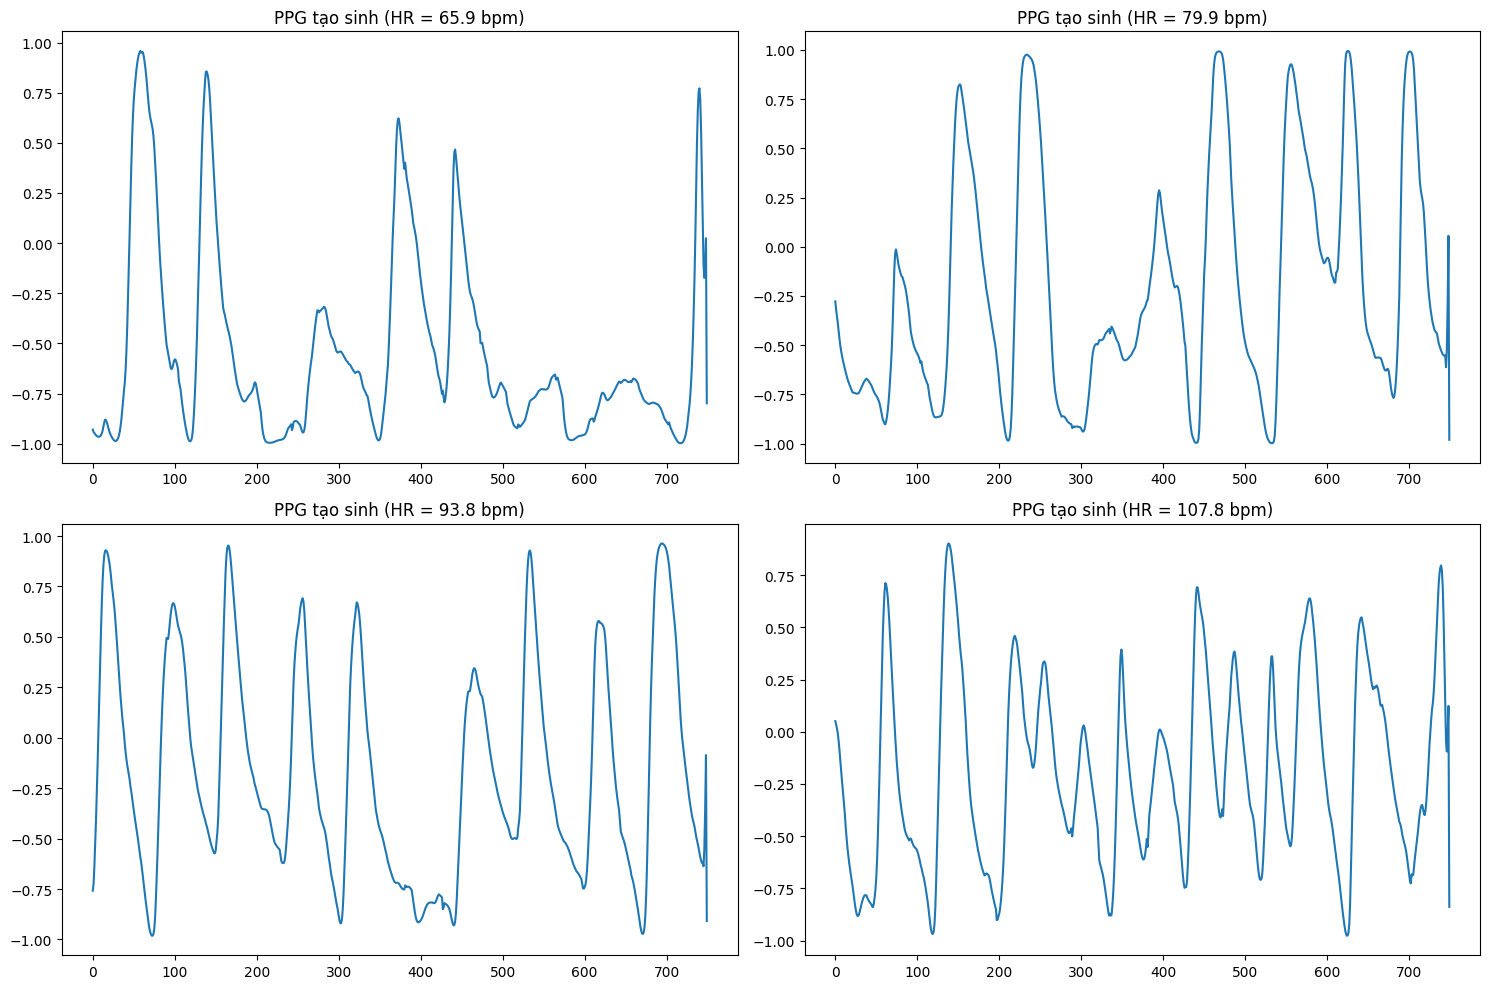

In [ ]:
# Tạo sinh PPG với các giá trị HR khác nhau
hr_values = np.linspace(0.2, 0.8, 4)  # Các giá trị HR đã chuẩn hóa
generated_hr_samples = []

for hr in hr_values:
    hr_tensor = torch.tensor([hr], dtype=torch.float32)
    generated = evaluate_generation(cgan, hr_tensor, device)
    generated_hr_samples.append(generated.cpu().squeeze(0))

# Vẽ đồ thị PPG tạo sinh với các giá trị HR khác nhau
plt.figure(figsize=(15, 10))

for i, hr in enumerate(hr_values):
    # Chuyển đổi HR chuẩn hóa về HR thực
    actual_hr = denormalize_hr(hr)

    plt.subplot(2, 2, i+1)
    plt.plot(generated_hr_samples[i].numpy())
    plt.title(f'PPG tạo sinh (HR = {actual_hr:.1f} bpm)')

plt.tight_layout()
plt.show()

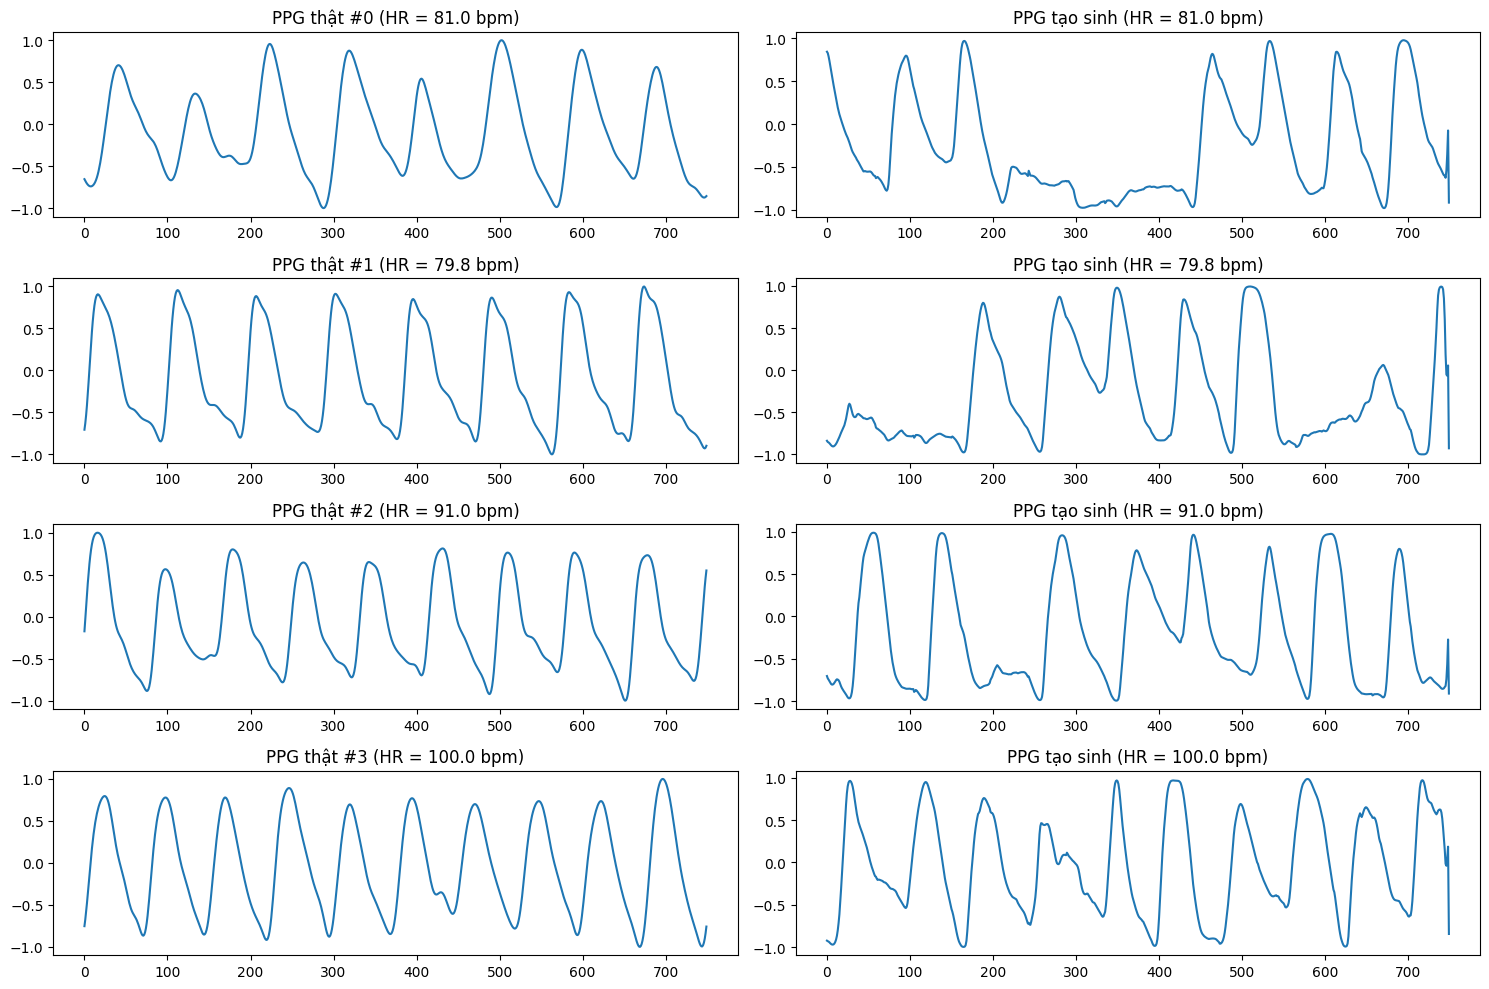

In [ ]:
# So sánh nhiều mẫu PPG thật và tạo sinh với cùng HR
plt.figure(figsize=(15, 10))

# Chọn 4 mẫu khác nhau từ tập test
selected_samples = []
selected_conditions = []
selected_indices = []

# Tìm các mẫu với HR khác nhau
unique_hrs = {}
for i, (data, condition) in enumerate(test_loader):
    if len(unique_hrs) >= 4:
        break
    for j, hr in enumerate(condition):
        hr_val = hr.item()
        hr_actual = denormalize_hr(hr_val)
        hr_rounded = round(hr_actual)

        if hr_rounded not in unique_hrs and len(unique_hrs) < 4:
            unique_hrs[hr_rounded] = (data[j], hr_val, i*len(condition)+j)
            selected_samples.append(data[j])
            selected_conditions.append(hr_val)
            selected_indices.append(i*len(condition)+j)

# Tạo sinh PPG với các điều kiện HR đã chọn
generated_selected = []
for hr in selected_conditions:
    hr_tensor = torch.tensor([hr], dtype=torch.float32)
    generated = evaluate_generation(cgan, hr_tensor, device)
    generated_selected.append(generated.cpu().squeeze(0))

# Vẽ đồ thị so sánh
for i in range(len(selected_samples)):
    actual_hr = denormalize_hr(selected_conditions[i])

    plt.subplot(4, 2, 2*i+1)
    plt.plot(selected_samples[i].cpu().numpy())
    plt.title(f'PPG thật #{selected_indices[i]} (HR = {actual_hr:.1f} bpm)')

    plt.subplot(4, 2, 2*i+2)
    plt.plot(generated_selected[i].numpy())
    plt.title(f'PPG tạo sinh (HR = {actual_hr:.1f} bpm)')

plt.tight_layout()
plt.show()